In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_validate,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, svm
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import seaborn
from matplotlib import pyplot
from sklearn.cluster import KMeans, DBSCAN
from sklearn.feature_selection import chi2, SelectKBest, SelectFdr
from sklearn.decomposition import PCA

Import data as data frame

In [2]:
dataPath = "/mnt/c/Users/LJUDY/OneDrive/MyStuff/Work/FedEx/Shift Lead/Clustering Project/"
fileName = "problem_pdsm_simple.csv"

data = pd.read_csv(dataPath + fileName)
data.head()

,Number,Priority,Business service,Category,Company,Created,Created by,Impact,Impacted OpCos,Major Problem,Parent,Problem Manager,Related Incidents,Type,Urgency
0,PRB0063212,5 - Planning,Server,Hardware,FedEx Services,2019-02-13 08:47:23,5163721,3 - Low,FedEx Services,True,INC011242667,Christopher Barber,1,ITCC,3 - Low
1,PRB0063211,5 - Planning,Database,Application,NaN,2019-02-13 08:49:50,3619116,3 - Low,FedEx Express APAC,False,NaN,Sathya Easwaran,0,Standard,3 - Low
2,PRB0063210,5 - Planning,Computer,Hardware,FedEx Services,2019-02-13 06:51:16,5163721,3 - Low,FedEx Ground,True,INC011241950,Divakar Durgapal,1,ITCC,3 - Low
3,PRB0063205,5 - Planning,Switch,Network,FedEx Services,2019-02-12 22:00:36,3667964,3 - Low,FedEx Ground,True,INC011240331,Christopher Barber,1,ITCC,3 - Low
4,PRB0063204,5 - Planning,Server,Hardware,FedEx Services,2019-02-12 21:03:05,836059,3 - Low,"FedEx Freight Inc., FedEx Office",True,INC011239460,Christopher Barber,1,ITCC,3 - Low


## Clean the data

Find out default types for the columns

In [3]:
data.dtypes

Number               object
Priority             object
Business service     object
Category             object
Company              object
Created              object
Created by           object
Impact               object
Impacted OpCos       object
Major Problem          bool
Parent               object
Problem Manager      object
Related Incidents     int64
Type                 object
Urgency              object
dtype: object

### Number column

Remove the PRB prefix from the Number column and convert it to a number

In [4]:
data['Number'] = data['Number'].map(lambda x: x.lstrip('PRB'))
data['Number'] = pd.to_numeric(data['Number'])
data.head()

,Number,Priority,Business service,Category,Company,Created,Created by,Impact,Impacted OpCos,Major Problem,Parent,Problem Manager,Related Incidents,Type,Urgency
0,63212,5 - Planning,Server,Hardware,FedEx Services,2019-02-13 08:47:23,5163721,3 - Low,FedEx Services,True,INC011242667,Christopher Barber,1,ITCC,3 - Low
1,63211,5 - Planning,Database,Application,NaN,2019-02-13 08:49:50,3619116,3 - Low,FedEx Express APAC,False,NaN,Sathya Easwaran,0,Standard,3 - Low
2,63210,5 - Planning,Computer,Hardware,FedEx Services,2019-02-13 06:51:16,5163721,3 - Low,FedEx Ground,True,INC011241950,Divakar Durgapal,1,ITCC,3 - Low
3,63205,5 - Planning,Switch,Network,FedEx Services,2019-02-12 22:00:36,3667964,3 - Low,FedEx Ground,True,INC011240331,Christopher Barber,1,ITCC,3 - Low
4,63204,5 - Planning,Server,Hardware,FedEx Services,2019-02-12 21:03:05,836059,3 - Low,"FedEx Freight Inc., FedEx Office",True,INC011239460,Christopher Barber,1,ITCC,3 - Low


In [5]:
data.dtypes

Number                int64
Priority             object
Business service     object
Category             object
Company              object
Created              object
Created by           object
Impact               object
Impacted OpCos       object
Major Problem          bool
Parent               object
Problem Manager      object
Related Incidents     int64
Type                 object
Urgency              object
dtype: object

### Priority, Impact, and Urgency

Take the first character (number) from each and convert to numeric

In [6]:
data['Priority'] = data['Priority'].map(lambda x: x[0])
data['Priority'] = pd.to_numeric(data['Priority'])

data['Impact'] = data['Impact'].map(lambda x: x[0])
data['Impact'] = pd.to_numeric(data['Impact'])

data['Urgency'] = data['Urgency'].map(lambda x: x[0])
data['Urgency'] = pd.to_numeric(data['Urgency'])

data.head()

,Number,Priority,Business service,Category,Company,Created,Created by,Impact,Impacted OpCos,Major Problem,Parent,Problem Manager,Related Incidents,Type,Urgency
0,63212,5,Server,Hardware,FedEx Services,2019-02-13 08:47:23,5163721,3,FedEx Services,True,INC011242667,Christopher Barber,1,ITCC,3
1,63211,5,Database,Application,NaN,2019-02-13 08:49:50,3619116,3,FedEx Express APAC,False,NaN,Sathya Easwaran,0,Standard,3
2,63210,5,Computer,Hardware,FedEx Services,2019-02-13 06:51:16,5163721,3,FedEx Ground,True,INC011241950,Divakar Durgapal,1,ITCC,3
3,63205,5,Switch,Network,FedEx Services,2019-02-12 22:00:36,3667964,3,FedEx Ground,True,INC011240331,Christopher Barber,1,ITCC,3
4,63204,5,Server,Hardware,FedEx Services,2019-02-12 21:03:05,836059,3,"FedEx Freight Inc., FedEx Office",True,INC011239460,Christopher Barber,1,ITCC,3


In [7]:
data.dtypes

Number                int64
Priority              int64
Business service     object
Category             object
Company              object
Created              object
Created by           object
Impact                int64
Impacted OpCos       object
Major Problem          bool
Parent               object
Problem Manager      object
Related Incidents     int64
Type                 object
Urgency               int64
dtype: object

### Categorical Fields

Check out category counts

In [8]:
data['Business service'].value_counts()

Server                          592
Computer                        484
Network                         127
Database                        122
Communication Device             71
Scanner                          45
Mainframe                        29
Printer                          21
Switch                           13
Storage                          12
Enterprise-Data-Analytics         9
Router                            7
Firewall                          6
Circuit                           3
EIS-ITO-CS-Operating-Systems      2
SASV                              2
Physical                          2
Sorter                            2
Peripheral                        2
CSVS-1SRC-Rating                  2
GRD-Scanner-Forms-System          1
AOSD-ACARS-DataLink               1
Avaya                             1
SRS-eDD                           1
CSHP                              1
CRDT                              1
AHEAD                             1
FXO-CI                      

In [9]:
data['Category'].value_counts()

Application       1077
Hardware           267
Network             41
Inquiry / Help      39
Infrastructure      32
Security            13
Telephony            5
Environment          2
Name: Category, dtype: int64

In [10]:
data['Company'].value_counts()

FedEx Services               565
FedEx Express                 97
FedEx Ground                  85
FedEx Freight Inc.            28
TNT Express-422               19
FedEx Office                   8
FedEx Ground LTD               2
FedEx Supply Chain             2
FTN Transport & Brokerage      1
FedEx                          1
TNT                            1
FedEx Supply Chain, Inc.       1
Name: Company, dtype: int64

In [11]:
data['Problem Manager'].value_counts()

Christopher Barber      145
Eli Smith               117
Naveen Kumar            114
Daniel Smith            110
Matthew Gonderinger      98
Christophe Gurley        88
Brad Moore               81
Mark Duncan              78
Michael Kennemer         67
Christina Hanlin         67
Dawn Gallo               63
Terri Hamilton           61
Greg Malek               60
Randall Painter          59
Stephen Wolff            40
Michael Olton            39
Charles McClain          34
Sami Al-Chokhachi        21
Sathya Easwaran          20
Carl Hartman             19
Roberto Lopez            18
D'Zundra Green           12
Dana Dennis              11
LaToya Williams          10
Stephen Barch            10
Gregory Burkhead          9
Joseph LaRosa             8
Kiran Kumar               8
Rajesh Ramanujachar       8
Richard Harwood           7
                       ... 
Indra Reddy               1
Marconius Donahue         1
Pravallika Uppuganti      1
Abhinav Purnam            1
Pooja Mehta         

In [12]:
data['Type'].value_counts()

ITCC         848
Standard     683
Proactive     81
Name: Type, dtype: int64

Cut categories with low counts and add together to make an "Other" category

In [13]:
data = data.apply(lambda x: x.mask(x.map(x.value_counts())<10, 'Other') if x.name=='Business service' else x)
data = data.apply(lambda x: x.mask(x.map(x.value_counts())<10, 'Other') if x.name=='Company' else x)
data = data.apply(lambda x: x.mask(x.map(x.value_counts())<10, 'Other') if x.name=='Problem Manager' else x)
data = data.apply(lambda x: x.mask(x.map(x.value_counts())<10, 'Other') if x.name=='Type' else x)
data.head()

,Number,Priority,Business service,Category,Company,Created,Created by,Impact,Impacted OpCos,Major Problem,Parent,Problem Manager,Related Incidents,Type,Urgency
0,63212,5,Server,Hardware,FedEx Services,2019-02-13 08:47:23,5163721,3,FedEx Services,True,INC011242667,Christopher Barber,1,ITCC,3
1,63211,5,Database,Application,NaN,2019-02-13 08:49:50,3619116,3,FedEx Express APAC,False,NaN,Sathya Easwaran,0,Standard,3
2,63210,5,Computer,Hardware,FedEx Services,2019-02-13 06:51:16,5163721,3,FedEx Ground,True,INC011241950,Other,1,ITCC,3
3,63205,5,Switch,Network,FedEx Services,2019-02-12 22:00:36,3667964,3,FedEx Ground,True,INC011240331,Christopher Barber,1,ITCC,3
4,63204,5,Server,Hardware,FedEx Services,2019-02-12 21:03:05,836059,3,"FedEx Freight Inc., FedEx Office",True,INC011239460,Christopher Barber,1,ITCC,3


Convert categorical fields to be a category type

In [15]:
data['Business service'] = data['Business service'].astype('category')
data['Category'] = data['Category'].astype('category')
data['Company'] = data['Company'].astype('category')
data['Problem Manager'] = data['Problem Manager'].astype('category')
data['Type'] = data['Type'].astype('category')
data.head()

,Number,Priority,Business service,Category,Company,Created,Created by,Impact,Impacted OpCos,Major Problem,Parent,Problem Manager,Related Incidents,Type,Urgency
0,63212,5,Server,Hardware,FedEx Services,2019-02-13 08:47:23,5163721,3,FedEx Services,True,INC011242667,Christopher Barber,1,ITCC,3
1,63211,5,Database,Application,NaN,2019-02-13 08:49:50,3619116,3,FedEx Express APAC,False,NaN,Sathya Easwaran,0,Standard,3
2,63210,5,Computer,Hardware,FedEx Services,2019-02-13 06:51:16,5163721,3,FedEx Ground,True,INC011241950,Other,1,ITCC,3
3,63205,5,Switch,Network,FedEx Services,2019-02-12 22:00:36,3667964,3,FedEx Ground,True,INC011240331,Christopher Barber,1,ITCC,3
4,63204,5,Server,Hardware,FedEx Services,2019-02-12 21:03:05,836059,3,"FedEx Freight Inc., FedEx Office",True,INC011239460,Christopher Barber,1,ITCC,3


In [16]:
data.dtypes

Number                  int64
Priority                int64
Business service     category
Category             category
Company              category
Created                object
Created by             object
Impact                  int64
Impacted OpCos         object
Major Problem            bool
Parent                 object
Problem Manager      category
Related Incidents       int64
Type                 category
Urgency                 int64
dtype: object

### Created

Convert the Created column to a datetime type

In [17]:
data['Created'] = data['Created'].astype('datetime64[ns]')
data.head()

,Number,Priority,Business service,Category,Company,Created,Created by,Impact,Impacted OpCos,Major Problem,Parent,Problem Manager,Related Incidents,Type,Urgency
0,63212,5,Server,Hardware,FedEx Services,2019-02-13 08:47:23,5163721,3,FedEx Services,True,INC011242667,Christopher Barber,1,ITCC,3
1,63211,5,Database,Application,NaN,2019-02-13 08:49:50,3619116,3,FedEx Express APAC,False,NaN,Sathya Easwaran,0,Standard,3
2,63210,5,Computer,Hardware,FedEx Services,2019-02-13 06:51:16,5163721,3,FedEx Ground,True,INC011241950,Other,1,ITCC,3
3,63205,5,Switch,Network,FedEx Services,2019-02-12 22:00:36,3667964,3,FedEx Ground,True,INC011240331,Christopher Barber,1,ITCC,3
4,63204,5,Server,Hardware,FedEx Services,2019-02-12 21:03:05,836059,3,"FedEx Freight Inc., FedEx Office",True,INC011239460,Christopher Barber,1,ITCC,3


In [18]:
data.dtypes

Number                        int64
Priority                      int64
Business service           category
Category                   category
Company                    category
Created              datetime64[ns]
Created by                   object
Impact                        int64
Impacted OpCos               object
Major Problem                  bool
Parent                       object
Problem Manager            category
Related Incidents             int64
Type                       category
Urgency                       int64
dtype: object

### Created by

Convert the Created by column to a number

In [19]:
data['Created by'] = pd.to_numeric(data['Created by'])
data.head()

ValueError: Unable to parse string "admin5069733" at position 905

Looks like there may be some that have "admin" before the id number. I am just going to remove this prefix.

In [20]:
data['Created by'] = data['Created by'].map(lambda x: x.lstrip('admin'))
data['Created by'] = pd.to_numeric(data['Created by'])
data.head()

,Number,Priority,Business service,Category,Company,Created,Created by,Impact,Impacted OpCos,Major Problem,Parent,Problem Manager,Related Incidents,Type,Urgency
0,63212,5,Server,Hardware,FedEx Services,2019-02-13 08:47:23,5163721,3,FedEx Services,True,INC011242667,Christopher Barber,1,ITCC,3
1,63211,5,Database,Application,NaN,2019-02-13 08:49:50,3619116,3,FedEx Express APAC,False,NaN,Sathya Easwaran,0,Standard,3
2,63210,5,Computer,Hardware,FedEx Services,2019-02-13 06:51:16,5163721,3,FedEx Ground,True,INC011241950,Other,1,ITCC,3
3,63205,5,Switch,Network,FedEx Services,2019-02-12 22:00:36,3667964,3,FedEx Ground,True,INC011240331,Christopher Barber,1,ITCC,3
4,63204,5,Server,Hardware,FedEx Services,2019-02-12 21:03:05,836059,3,"FedEx Freight Inc., FedEx Office",True,INC011239460,Christopher Barber,1,ITCC,3


In [21]:
data.dtypes

Number                        int64
Priority                      int64
Business service           category
Category                   category
Company                    category
Created              datetime64[ns]
Created by                    int64
Impact                        int64
Impacted OpCos               object
Major Problem                  bool
Parent                       object
Problem Manager            category
Related Incidents             int64
Type                       category
Urgency                       int64
dtype: object

### Impacted OpCos

Split Impacted OpCos column into list of OpCos instead of string

In [23]:
data['Impacted OpCos'] = data['Impacted OpCos'].map(lambda x: x.split(","))

AttributeError: 'float' object has no attribute 'split'

Weird.. Let's look for that float 

In [24]:
data[data['Impacted OpCos'].apply(np.isreal)]

,Number,Priority,Business service,Category,Company,Created,Created by,Impact,Impacted OpCos,Major Problem,Parent,Problem Manager,Related Incidents,Type,Urgency
94,62775,5,Communication Device,Hardware,FedEx Express,2019-01-26 07:22:01,5163721,3,NaN,False,NaN,Other,0,NaN,3
244,62336,5,Computer,Hardware,Other,2018-12-20 11:31:14,5163721,3,NaN,True,INC011012467,Other,1,NaN,3
405,61944,5,Communication Device,Application,FedEx Express,2018-11-16 07:18:18,882238,3,NaN,False,INC010750660,Other,1,NaN,3
494,61676,5,Database,Application,FedEx Services,2018-10-26 08:59:48,192015,3,NaN,True,INC010727566,Other,1,NaN,3
524,61582,5,Communication Device,Application,FedEx Ground,2018-10-18 19:09:36,2668981,3,NaN,False,INC010695045,Other,1,NaN,3
525,61581,5,Computer,Hardware,FedEx Services,2018-10-18 18:53:03,973921,3,NaN,True,INC010667497,Stephen Barch,1,NaN,3
583,61471,5,Scanner,Hardware,Other,2018-10-02 17:10:48,752021,3,NaN,False,INC010601708,Roberto Lopez,1,NaN,3
601,61447,5,Network,Hardware,FedEx Services,2018-09-27 11:34:28,5163721,3,NaN,True,INC010580900,Other,1,NaN,3
631,61405,5,Server,Hardware,FedEx Services,2018-09-20 15:06:30,5285658,3,NaN,False,INC010329232,Other,1,NaN,3
859,61051,5,Other,NaN,NaN,2018-07-20 17:01:21,644707,3,NaN,False,NaN,NaN,0,NaN,3


Looks like the NaNs are the problem. Convert NaNs to empty strings.

In [25]:
data['Impacted OpCos'] = data['Impacted OpCos'].replace(np.nan, '', regex=True)
data[data['Impacted OpCos'].apply(np.isreal)]

,Number,Priority,Business service,Category,Company,Created,Created by,Impact,Impacted OpCos,Major Problem,Parent,Problem Manager,Related Incidents,Type,Urgency


There's no longer any NaNs, so let's try the split again

In [26]:
data['Impacted OpCos'] = data['Impacted OpCos'].map(lambda x: x.split(","))
data.head()

,Number,Priority,Business service,Category,Company,Created,Created by,Impact,Impacted OpCos,Major Problem,Parent,Problem Manager,Related Incidents,Type,Urgency
0,63212,5,Server,Hardware,FedEx Services,2019-02-13 08:47:23,5163721,3,[FedEx Services],True,INC011242667,Christopher Barber,1,ITCC,3
1,63211,5,Database,Application,NaN,2019-02-13 08:49:50,3619116,3,[FedEx Express APAC],False,NaN,Sathya Easwaran,0,Standard,3
2,63210,5,Computer,Hardware,FedEx Services,2019-02-13 06:51:16,5163721,3,[FedEx Ground],True,INC011241950,Other,1,ITCC,3
3,63205,5,Switch,Network,FedEx Services,2019-02-12 22:00:36,3667964,3,[FedEx Ground],True,INC011240331,Christopher Barber,1,ITCC,3
4,63204,5,Server,Hardware,FedEx Services,2019-02-12 21:03:05,836059,3,"[FedEx Freight Inc., FedEx Office]",True,INC011239460,Christopher Barber,1,ITCC,3


Now we have the list, but we can't do anything with the list. Let's convert to dummy variables.

In [27]:
pd.get_dummies(data['Impacted OpCos'].apply(pd.Series).stack()).sum(level=0).head()

,,FedEx,FedEx Custom Critical,FedEx Express,FedEx Express APAC,FedEx Express Canada,FedEx Express Domestic,FedEx Express LAC,FedEx Express MEISA,FedEx Freight Corporate,...,FedEx SmartPost,FedEx Supply Chain,FedEx Trade Networks,Federal Express (Aruba) N.V.,TNT APAC,TNT Australia,TNT Corporate,TNT Express Global Networks,TNT Express-422,TNT Slovenia
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


That will take a lot of further processing, so I am going to drop that for now.

In [28]:
data = data.drop('Impacted OpCos', axis=1)
data.head()

,Number,Priority,Business service,Category,Company,Created,Created by,Impact,Major Problem,Parent,Problem Manager,Related Incidents,Type,Urgency
0,63212,5,Server,Hardware,FedEx Services,2019-02-13 08:47:23,5163721,3,True,INC011242667,Christopher Barber,1,ITCC,3
1,63211,5,Database,Application,NaN,2019-02-13 08:49:50,3619116,3,False,NaN,Sathya Easwaran,0,Standard,3
2,63210,5,Computer,Hardware,FedEx Services,2019-02-13 06:51:16,5163721,3,True,INC011241950,Other,1,ITCC,3
3,63205,5,Switch,Network,FedEx Services,2019-02-12 22:00:36,3667964,3,True,INC011240331,Christopher Barber,1,ITCC,3
4,63204,5,Server,Hardware,FedEx Services,2019-02-12 21:03:05,836059,3,True,INC011239460,Christopher Barber,1,ITCC,3


In [29]:
data.dtypes

Number                        int64
Priority                      int64
Business service           category
Category                   category
Company                    category
Created              datetime64[ns]
Created by                    int64
Impact                        int64
Major Problem                  bool
Parent                       object
Problem Manager            category
Related Incidents             int64
Type                       category
Urgency                       int64
dtype: object

### Parent

Convert Parent column to a boolean Has Parent column

In [30]:
data['Has Parent'] = data['Parent'].map(lambda x: not(np.isreal(x)))
data = data.drop('Parent', axis=1)
data.head()

,Number,Priority,Business service,Category,Company,Created,Created by,Impact,Major Problem,Problem Manager,Related Incidents,Type,Urgency,Has Parent
0,63212,5,Server,Hardware,FedEx Services,2019-02-13 08:47:23,5163721,3,True,Christopher Barber,1,ITCC,3,True
1,63211,5,Database,Application,NaN,2019-02-13 08:49:50,3619116,3,False,Sathya Easwaran,0,Standard,3,False
2,63210,5,Computer,Hardware,FedEx Services,2019-02-13 06:51:16,5163721,3,True,Other,1,ITCC,3,True
3,63205,5,Switch,Network,FedEx Services,2019-02-12 22:00:36,3667964,3,True,Christopher Barber,1,ITCC,3,True
4,63204,5,Server,Hardware,FedEx Services,2019-02-12 21:03:05,836059,3,True,Christopher Barber,1,ITCC,3,True


In [31]:
data.dtypes

Number                        int64
Priority                      int64
Business service           category
Category                   category
Company                    category
Created              datetime64[ns]
Created by                    int64
Impact                        int64
Major Problem                  bool
Problem Manager            category
Related Incidents             int64
Type                       category
Urgency                       int64
Has Parent                     bool
dtype: object

Now all columns have a proper data type; let's drop the NaNs and look at our clean data set

In [33]:
data = data.dropna()
data

,Number,Priority,Business service,Category,Company,Created,Created by,Impact,Major Problem,Problem Manager,Related Incidents,Type,Urgency,Has Parent
0,63212,5,Server,Hardware,FedEx Services,2019-02-13 08:47:23,5163721,3,True,Christopher Barber,1,ITCC,3,True
2,63210,5,Computer,Hardware,FedEx Services,2019-02-13 06:51:16,5163721,3,True,Other,1,ITCC,3,True
3,63205,5,Switch,Network,FedEx Services,2019-02-12 22:00:36,3667964,3,True,Christopher Barber,1,ITCC,3,True
4,63204,5,Server,Hardware,FedEx Services,2019-02-12 21:03:05,836059,3,True,Christopher Barber,1,ITCC,3,True
6,63201,5,Switch,Network,FedEx Ground,2019-02-12 07:58:23,5163721,3,True,Eli Smith,1,ITCC,3,True
7,63200,3,Computer,Application,FedEx Express,2019-02-12 06:07:53,5163721,2,True,Terri Hamilton,1,ITCC,2,True
8,63195,5,Switch,Network,FedEx Freight Inc.,2019-02-12 04:42:01,5163721,3,True,Eli Smith,1,ITCC,3,True
9,63194,3,Switch,Network,FedEx Ground,2019-02-12 03:16:19,3667964,3,True,Eli Smith,1,ITCC,1,True
10,63187,2,Computer,Hardware,FedEx Express,2019-02-11 22:03:47,5305519,2,True,Christopher Barber,1,ITCC,1,True
12,63173,5,Scanner,Hardware,FedEx Ground,2019-02-11 14:23:59,973921,3,True,Christopher Barber,1,ITCC,3,True


## Exploratory Data Analysis

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


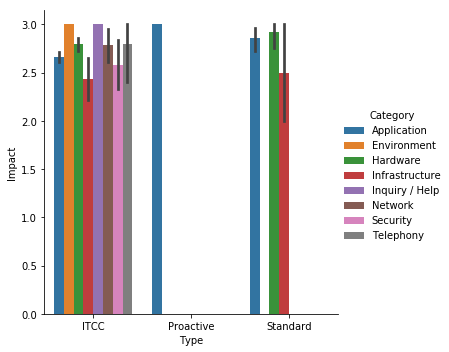

In [41]:
seaborn.catplot(x="Type", y="Impact", hue="Category", kind="bar", data=data);

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


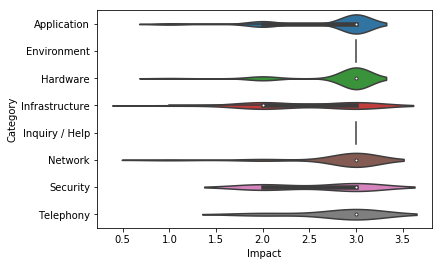

In [38]:
seaborn.violinplot(y='Category',x='Impact',data=data)

## Set up for modeling

### Split up dependent and independent variables

In [357]:
y = data['Category']
x = data.drop('Category', axis=1)

### Dummy variables for categories

In [358]:
x = pd.get_dummies(x, columns=['Business service', 'Company', 'Problem Manager', 'Type'])
x.head()

,Number,Priority,Created,Created by,Impact,Major Problem,Related Incidents,Urgency,Has Parent,kmeans,...,Problem Manager_Terri Hamilton,Problem Manager_Timothy Newell,Problem Manager_Timothy Truax,Problem Manager_Vincent Gatti,Problem Manager_William Kiehl,Problem Manager_William Settino,Problem Manager_Zhe-Hui Robert Luo,Type_ITCC,Type_Proactive,Type_Standard
0,63212,5,2019-02-13 08:47:23,5163721,3,True,1,3,True,1,...,0,0,0,0,0,0,0,1,0,0
2,63210,5,2019-02-13 06:51:16,5163721,3,True,1,3,True,1,...,0,0,0,0,0,0,0,1,0,0
3,63205,5,2019-02-12 22:00:36,3667964,3,True,1,3,True,2,...,0,0,0,0,0,0,0,1,0,0
4,63204,5,2019-02-12 21:03:05,836059,3,True,1,3,True,0,...,0,0,0,0,0,0,0,1,0,0
6,63201,5,2019-02-12 07:58:23,5163721,3,True,1,3,True,1,...,0,0,0,0,0,0,0,1,0,0


## Model using K-means

In [359]:
model = KMeans(n_clusters=8)
model.fit(x)

TypeError: float() argument must be a string or a number, not 'Timestamp'

In [360]:
smallX = x.drop('Created', axis=1)

In [361]:
model = KMeans(n_clusters=8)
model.fit(smallX)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [362]:
data['kmeans'] = model.labels_

/home/laurarnichols/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [363]:
metrics.adjusted_rand_score(data['Category'],data['kmeans'])

0.0010448222783435706

In [364]:
pca = PCA()
pca.fit(smallX)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [365]:
pca.explained_variance_ratio_

array([9.99999828e-01, 1.72425326e-07, 9.79350405e-13, 6.03167607e-13,
       3.48065939e-13, 1.66083423e-13, 1.03092795e-13, 7.23985202e-14,
       6.28128733e-14, 4.75737762e-14, 4.37911957e-14, 3.52627759e-14,
       3.16152232e-14, 2.97547279e-14, 2.67686313e-14, 2.50012311e-14,
       2.34299428e-14, 2.23863400e-14, 2.06451188e-14, 1.88442286e-14,
       1.60670417e-14, 1.55821153e-14, 1.18445676e-14, 1.05911522e-14,
       1.03502598e-14, 8.49591677e-15, 6.82632439e-15, 5.82916413e-15,
       4.57539620e-15, 4.38586637e-15, 3.95408887e-15, 3.48198861e-15,
       2.77258040e-15, 2.69148181e-15, 2.56232620e-15, 2.30454994e-15,
       1.74936985e-15, 1.53123185e-15, 1.40885166e-15, 1.25682927e-15,
       1.17042153e-15, 1.09755649e-15, 1.07268928e-15, 1.04297215e-15,
       9.93058014e-16, 9.64704926e-16, 9.36946777e-16, 8.88838601e-16,
       8.56037207e-16, 7.37423233e-16, 7.36705237e-16, 7.32330959e-16,
       7.28883005e-16, 7.25048125e-16, 7.18705895e-16, 7.14916036e-16,
      

In [366]:
pca = PCA(n_components=2)
pca.fit(smallX)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [367]:
pca.explained_variance_ratio_

array([9.99999828e-01, 1.72425326e-07])

In [368]:
transformed = pca.transform(smallX)

In [374]:
km = KMeans(n_clusters=8)
km.fit(transformed)
data['pca'] = km.labels_

/home/laurarnichols/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [375]:
metrics.adjusted_rand_score(data['Category'],data['kmeans'])

0.0010448222783435706